In [1]:
import os
import pandas as pd

In [2]:
from numpy.random import normal

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
os.chdir(os.path.join(os.getcwd(),'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.transit import *
from ExMAS.utils import inData as inData

In [56]:
params = ExMAS.utils.get_config('ExMAS/data/configs/potential.json')  # load the 
inData.params = params


params.nP = 100
params.simTime = 0.2
params.speeds.ride = 8
params.mode_choice_beta = -0.5
params.speeds.walk = 1.2
params.walk_discomfort = 2
params.delay_value = 1.5
params.walk_threshold = 600
params.shared_discount = 0.3
params.s2s_discount = 0.6
params.crs = {"init": "epsg:4326"}
params.min_dist = 2000
params.t0 = '15:00'
params.NAME = 'transit'
params.city = 'Amsterdam'
params = ExMAS.utils.make_paths(params)
ExMAS.utils.save_config(params,'ExMAS/data/configs/transit.json')  # load the 

In [36]:
params.name

DotMap()

In [15]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [16]:
from ExMAS.albatross import *

In [17]:
inData = albatross_import(inData,params)

In [18]:
inData = albatross_process(inData, params)

Amsterdam 81


In [27]:
from ExMAS.main import init_log
inData.logger = init_log(params)

In [19]:
inData = generate_demand_albatross(inData,params, sample = None)

In [20]:
save_albatross_to_csv(inData, params)

In [64]:
params.t0 =pd.to_datetime(params.t0)
inData = ExMAS.utils.load_albatross_csv(inData, params)
alb = inData.requests.copy()

10-06-21 12:39:05-INFO-100 trips generated from dataset of 245101 records. Time: [2021-06-10 15:00:00-2021-06-10 15:59:00] mean distance 4931.28


In [66]:
inData = ExMAS.utils.generate_demand(inData, params)
inData.requests

,origin,destination,treq,tarr,ttrav,dist,ttrav_alb,pax_id
52,1318851540,5827691887,2021-06-10 14:54:05,2021-06-10 15:13:17,0 days 00:19:12,1152,NaN,52
83,1511593135,46440415,2021-06-10 14:54:13,2021-06-10 16:35:24,0 days 01:41:11,6071,NaN,83
42,46335875,6206420405,2021-06-10 14:54:14,2021-06-10 16:19:09,0 days 01:24:55,5095,NaN,42
76,1332773715,3301087365,2021-06-10 14:54:25,2021-06-10 15:54:43,0 days 01:00:18,3618,NaN,76
90,46388899,2300133219,2021-06-10 14:54:36,2021-06-10 15:24:19,0 days 00:29:43,1783,NaN,90
...,...,...,...,...,...,...,...,...
12,46254577,46317817,2021-06-10 15:05:35,2021-06-10 15:41:59,0 days 00:36:24,2184,NaN,12
71,46219620,46427364,2021-06-10 15:05:45,2021-06-10 16:59:32,0 days 01:53:47,6827,NaN,71
96,601499185,46422988,2021-06-10 15:05:49,2021-06-10 16:03:00,0 days 00:57:11,3431,NaN,96
29,2021881823,46303528,2021-06-10 15:05:56,2021-06-10 15:52:44,0 days 00:46:48,2808,NaN,29


In [67]:
alb

,origin,destination,treq,tarr,ttrav,dist,ttrav_alb,pax_id
4207416,46416250,3309328504,2021-06-10 15:49:00,2021-06-10 16:10:00,0 days 01:11:24,4284,0 days 00:21:00,4207416
4513622,46243069,46338087,2021-06-10 15:48:00,2021-06-10 16:01:00,0 days 00:54:54,3294,0 days 00:13:00,4513622
4388454,1805853725,3784893824,2021-06-10 15:06:00,2021-06-10 15:11:00,0 days 00:55:32,3332,0 days 00:05:00,4388454
4230318,1692929188,46301819,2021-06-10 15:53:00,2021-06-10 16:08:00,0 days 00:39:49,2389,0 days 00:15:00,4230318
4488087,46291553,46270853,2021-06-10 15:45:00,2021-06-10 16:01:00,0 days 00:51:29,3089,0 days 00:16:00,4488087
...,...,...,...,...,...,...,...,...
4334885,46388186,46481439,2021-06-10 15:06:00,2021-06-10 15:15:00,0 days 01:21:48,4908,0 days 00:09:00,4334885
4508327,46375178,46393247,2021-06-10 15:47:00,2021-06-10 16:01:00,0 days 01:04:21,3861,0 days 00:14:00,4508327
4576898,46278428,46344541,2021-06-10 15:26:00,2021-06-10 15:49:00,0 days 01:57:27,7047,0 days 00:23:00,4576898
4484960,568109786,46220713,2021-06-10 15:56:00,2021-06-10 16:01:00,0 days 01:46:14,6374,0 days 00:05:00,4484960


In [63]:
inData.requests

,origin,destination,treq,tarr,ttrav,dist,ttrav_alb,pax_id
67,46438434,46430099,2021-06-10 14:54:03,2021-06-10 15:19:08,0 days 00:25:05,1505,NaN,67
11,7602862099,46372928,2021-06-10 14:54:05,2021-06-10 15:31:41,0 days 00:37:36,2256,NaN,11
45,46393358,46411497,2021-06-10 14:54:06,2021-06-10 16:12:37,0 days 01:18:31,4711,NaN,45
54,46466587,46388666,2021-06-10 14:54:06,2021-06-10 15:30:36,0 days 00:36:30,2190,NaN,54
24,46368484,2300172823,2021-06-10 14:54:12,2021-06-10 16:06:58,0 days 01:12:46,4366,NaN,24
...,...,...,...,...,...,...,...,...
100,46407194,46343002,2021-06-10 15:05:40,2021-06-10 17:07:48,0 days 02:02:08,7328,NaN,100
71,46475705,2021881776,2021-06-10 15:05:53,2021-06-10 16:45:14,0 days 01:39:21,5961,NaN,71
13,46471422,46380482,2021-06-10 15:05:53,2021-06-10 16:41:11,0 days 01:35:18,5718,NaN,13
91,46368135,46401453,2021-06-10 15:05:58,2021-06-10 15:36:48,0 days 00:30:50,1850,NaN,91


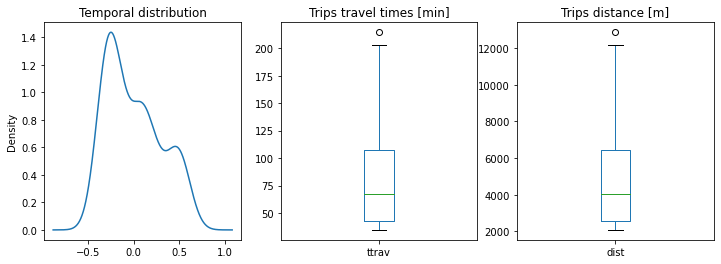

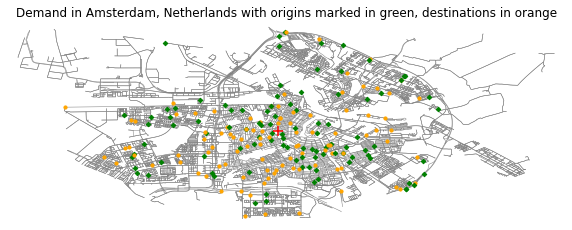

In [26]:
ExMAS.utils.plot_demand(inData,params)

In [50]:
inData.requests = pd.read_csv("ExMAS/data/albatross/Amsterdam_requests.csv",index_col = 0)

In [55]:
inData.requests.treq = pd.to_datetime(inData.requests.treq)

In [52]:
inData.requests['origin_x'] = inData.requests['origin'].apply(lambda x: inData.nodes.loc[x].x)

In [53]:
inData.requests['origin_y'] = inData.requests['origin'].apply(lambda x: inData.nodes.loc[x].y)
inData.requests['destination_x'] = inData.requests['destination'].apply(lambda x: inData.nodes.loc[x].x)
inData.requests['destination_y'] = inData.requests['destination'].apply(lambda x: inData.nodes.loc[x].y)

In [56]:
inData.requests['treq'] = inData.requests['treq'].apply(lambda x: x.replace(year = 2020,month = 10, day = 27))
inData.requests.to_csv("Amsterdam.csv")

In [68]:
#params.shared_discount = 0.3
#inData = ExMAS.utils.generate_demand(inData, params)
inData = ExMAS.main(inData, params, plot=False)
#ExMAS.utils.make_traveller_ride_matrix(inData)

10-06-21 12:53:16-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
10-06-21 12:53:16-INFO-creating combinations
10-06-21 12:53:16-INFO-9900	 nR*(nR-1)
10-06-21 12:53:17-INFO-Reduction of feasible pairs by 98.78%
10-06-21 12:53:17-INFO-Degree 2 	Completed
10-06-21 12:53:17-INFO-trips to extend at degree 2 : 298
10-06-21 12:53:17-INFO-At degree 2 feasible extensions found out of 76 searched
10-06-21 12:53:17-INFO-Degree 3 	Completed
10-06-21 12:53:17-INFO-trips to extend at degree 3 : 76
10-06-21 12:53:17-INFO-At degree 3 feasible extensions found out of 4 searched
10-06-21 12:53:17-INFO-Degree 4 	Completed
10-06-21 12:53:17-INFO-trips to extend at degree 4 : 4
10-06-21 12:53:18-INFO-At degree 4 feasible extensions found out of 0 searched
10-06-21 12:53:18-INFO-Degree 5 	Completed
10-06-21 12:53:18-INFO-No more trips to exted at degree 5
10-06-21 12:53:18-INFO-Matching 100 trips to 478 rides in order to min u_veh
10-06-21 12:53:18-INFO-Problem solution: Optimal. 
T

In [ ]:
transits = pd.read_csv('ExMAS/data/transits/300/transits.csv', index_col = 0)
requests = pd.read_csv('ExMAS/data/transits/300/requests.csv', index_col = 0)
r2 = pd.read_csv('ExMAS/data/transits/300/rides2.csv', index_col = 0)
del requests['index']
rm = pd.read_csv('ExMAS/data/transits/300/transit_rm.csv')
rm['pax_id'] = rm['Unnamed: 0']
del rm['Unnamed: 0']

In [170]:
transitizables = pd.read_csv('ExMAS/data/transits/tranisitizables.csv', index_col=0)
transitizables["low_level_indexes"] = transitizables["low_level_indexes"].apply(lambda x: json.loads(x))
transitizables

,origin,destination,treq,ttrav,df,efficient,transitizable,dist,indexes,indexes_set,unmergables,pax_id,low_level_indexes
102,643587012,4349049067,1059,338,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2704,"[43, 57]","{57, 43}",[],102,"[43, 57]"
121,1508490990,1668136725,869,461,ride exp_u_private exp_u_d2d ... exp_u...,True,True,3688,"[33, 38]","{33, 38}",[],121,"[33, 38]"
127,44898446,4349049085,1089,347,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2776,"[61, 62]","{61, 62}",[],127,"[61, 62]"
141,1413911066,1435362416,1204,452,ride exp_u_private exp_u_d2d ... exp_u...,True,True,3616,"[75, 87]","{75, 87}",[],141,"[75, 87]"
152,44798698,1830058778,1190,486,ride exp_u_private exp_u_d2d ... exp_u...,True,True,3888,"[67, 84]","{67, 84}",[],152,"[67, 84]"


In [171]:
r2.sample(2)

,Unnamed: 0,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index
32,32,"[141, 127, 152]",16.96725,1688,30,"[6.5831, 3.9038500000000003, 6.4803]","[1037.0, 234, 455, 171, 215, 613]","[141, 127, 152]","[127, 141, 152]",NaN,32
7,7,"[121, 141]",13.09040,1714,20,"[6.18355, 6.90685]","[848.0, 392, 711, 596]","[121, 141]","[121, 141]",2.0,7


In [173]:
sum(transitizables.loc[[121, 102]].low_level_indexes.to_list(),[])

[33, 38, 43, 57]

In [177]:
r2['indexes'] = r2.apply(lambda x: sum(transitizables.loc[x.indexes].low_level_indexes.to_list(),[]), axis = 1)

((189, 18), (155, 18), (34, 11))

In [42]:
from ExMAS.main import matching

In [154]:
r1 = pd.read_csv('ExMAS/data/transits/rides1.csv')
r1.treqs = r1.treqs.apply(lambda x: x.replace("  "," "))
r1.treqs = r1.treqs.apply(lambda x: x.replace("[ ","["))
r1.treqs = r1.treqs.apply(lambda x: x.replace("[\n","["))
r1.treqs = r1.treqs.apply(lambda x: x.replace(" ",","))
r2 = pd.read_csv('ExMAS/data/transits/rides2.csv')
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times']:
    print(col)
    r2[col] = r2[col].apply(lambda x: json.loads(x))
transitizable = pd.read_csv('ExMAS/data/transits/tranisitizables.csv')
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times','origins','destinations','deps','dep_deltas', 'ttravs','treqs']:
    print(col)
    r1[col] = r1[col].apply(lambda x: json.loads(x))


indexes
indexes_dest
indexes_orig
u_paxes
times
indexes
indexes_dest
indexes_orig
u_paxes
times
origins
destinations
deps
dep_deltas
ttravs
treqs


In [203]:
import pprint
pprint.pprint(params)

{'PT_discount': DotMap(),
 'VoT': 0.0035,
 'WtS': 1.3,
 'avg_speed': 8,
 'city': 'Delft, Netherlands',
 'delay_value': 1.5,
 'demand_structure': {'destinations_dispertion': -0.001,
                      'origins_dispertion': -0.0003,
                      'temporal_dispertion': 0.3,
                      'temporal_distribution': 'uniform'},
 'dist_threshold': 100000,
 'fare': DotMap(),
 'horizon': 1200,
 'matching_obj': 'u_veh',
 'max_degree': 8,
 'mode_choice_beta': -0.5,
 'nP': 100,
 'paths': {'G': 'ExMAS/data/graphs/Delft.graphml',
           'albatross': 'ExMAS/data/albatross',
           'data': 'ExMAS/data',
           'main': 'ExMAS',
           'params': 'ExMAS/data/configs',
           'postcodes': 'ExMAS/data/postcodes/PC4_Nederland_2015.shp',
           'skim': 'ExMAS/data/graphs/Delft.csv'},
 'pax_delay': 15,
 'price': 1.5,
 'profitability': False,
 's2s_discount': 0.6,
 'shared_discount': 0.3,
 'simTime': 0.2,
 'speeds': DotMap(ride=8, walk=1.2),
 't0': Timestamp('2021-06-

In [192]:
inData.sblts.rides = pd.concat([r1,r2])
inData.sblts.rides.shape, r1.shape, r2.shape

((189, 18), (155, 18), (34, 11))

In [180]:
inData.sblts.rides = pd.concat([r1,r2])
inData = matching(inData, params, make_assertion = False)

07-06-21 16:13:41-INFO-Matching 100 trips to 189 rides in order to min u_veh
07-06-21 16:13:41-INFO-Problem solution: Optimal. 
Total costs for single trips:         33,190 
reduced by matching to:               28,367


ValueError: 43 is not in list

In [25]:
r2

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index
0,[0],1.371750,372,1,[1.37175],"[735, 372]",[0],[0],1,0
1,[1],1.371750,372,1,[1.37175],"[735, 372]",[1],[1],1,1
2,[2],1.290625,350,1,[1.2906250000000001],"[856, 350]",[2],[2],1,2
3,[3],1.084125,294,1,[1.084125],"[1268, 294]",[3],[3],1,3
4,[4],1.062000,288,1,[1.062],"[1268, 288]",[4],[4],1,4


In [22]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [24]:
inData = ExMAS.utils.generate_demand(inData, params)
inData = ExMAS.main(inData, params, plot=False)

07-06-21 13:58:50-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
07-06-21 13:58:50-INFO-creating combinations
DotMap()
07-06-21 13:58:50-INFO-9900	 nR*(nR-1)
07-06-21 13:58:50-INFO-Reduction of feasible pairs by 98.94%
07-06-21 13:58:50-INFO-Degree 2 	Completed
07-06-21 13:58:51-INFO-trips to extend at degree 2 : 280
07-06-21 13:58:51-INFO-At degree 2 feasible extensions found out of 25 searched
07-06-21 13:58:51-INFO-Degree 3 	Completed
07-06-21 13:58:51-INFO-trips to extend at degree 3 : 25
07-06-21 13:58:51-INFO-At degree 3 feasible extensions found out of 0 searched
07-06-21 13:58:51-INFO-Degree 4 	Completed
07-06-21 13:58:51-INFO-No more trips to exted at degree 4
07-06-21 13:58:51-INFO-Matching 100 trips to 405 rides in order to min u_veh
07-06-21 13:58:51-INFO-Problem solution: Optimal. 
Total costs for single trips:         33,371 
reduced by matching to:               26,616
07-06-21 13:58:51-INFO-Calculations  completed
07-06-21 13:58:51-INFO-DotMap(V

In [11]:
df = transits[transits['efficient']]
df['low_level_indexes'] = df.apply(lambda x: rm[rm.ride==x.name].pax_id.to_list(),axis = 1)
df['pax_id'] = df.index.copy()

In [12]:
inData.requests = requests
inData.requests.treq = requests.treq.apply(lambda x: pd.to_datetime(x,unit = 's'))
inData.requests.ttrav = requests.ttrav.apply(lambda x: pd.to_timedelta(x*params.avg_speed,unit = 's'))

In [13]:
df = transits[transits['efficient']]

In [14]:
df['indexes_set'] = df.apply(lambda x: set(rm[rm.ride== x.name].pax_id.to_list()), axis =1)
df['indexes'] = df.apply(lambda x: rm[rm.ride== x.name].pax_id.to_list(), axis =1)

In [15]:
df['pax_id'] = df.index.copy()
df = df.reset_index()
df['dist'] = df.apply(lambda x: inData.skim.loc[x.origin, x.destination], axis= 1)
df['treq'] = df['treq'].apply(lambda x: pd.to_datetime(x,unit = 's'))
df['ttrav'] = df.ttrav.apply(lambda x: pd.to_timedelta(x*params.avg_speed,unit = 's'))

In [19]:
df

,origin,destination,dep,ttrav,df,efficient,transitizable,treq,dist,indexes_set,indexes
333,2.381861e+09,6.435866e+08,NaN,327.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,1233.0,40.875,"{224, 267}","[224, 267]"
340,4.487323e+07,6.260100e+08,NaN,370.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,1212.0,46.250,"{257, 250}","[250, 257]"
353,5.273788e+08,4.481310e+07,NaN,303.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,937.0,37.875,"{142, 135}","[142, 135]"
357,5.273788e+08,4.481310e+07,NaN,303.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,937.0,37.875,"{142, 135}","[135, 142]"
361,1.576746e+09,4.481360e+07,NaN,521.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,843.0,65.125,"{33, 101}","[33, 101]"
...,...,...,...,...,...,...,...,...,...,...,...
814,1.570983e+09,1.580652e+09,NaN,564.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,787.0,70.500,"{44, 76}","[44, 76]"
816,4.473010e+07,1.391417e+09,NaN,550.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,819.0,68.750,"{88, 44}","[44, 88]"
819,4.472612e+07,1.620328e+09,NaN,572.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,766.0,71.500,"{65, 44}","[44, 65]"
834,4.473157e+07,4.846026e+09,NaN,527.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,819.0,65.875,"{88, 65, 44}","[65, 44, 88]"


In [16]:
df.dist

333    40.875
340    46.250
353    37.875
357    37.875
361    65.125
        ...  
814    70.500
816    68.750
819    71.500
834    65.875
849    65.875
Name: dist, Length: 68, dtype: float64

In [16]:
def unmergables(row):
    # returns list of all the subgroup indiced contained in a ride
    return df[df.indexes_set.apply(lambda x: len(x.intersection(row.indexes_set)))>0].index.to_list()
df['unmergables'] = df.apply(unmergables, axis=1)
df.unmergables = df.apply(lambda m: [x for x in m.unmergables if x != m.name], axis = 1)

In [26]:
unmergables = list()
for i,row in df.iterrows():
    [unmergables.append((row.name,_)) for _ in row.unmergables]
inData.unmergables = unmergables

In [19]:
params.shared_discount = 0.5

In [24]:
params.VoT_std = False

In [29]:
inData.requests = df

In [31]:
from ExMAS.main import pairs, single_rides, init_log
params.check = False
inData.logger = init_log(params)  # initialize console logger
inData = single_rides(inData, params) # prepare requests as a potential single rides
r = pairs(inData,params)

07-06-21 11:31:06-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
07-06-21 11:31:06-INFO-creating combinations
07-06-21 11:31:07-INFO-Removing 220 unmergable pairs from the solution of 4556
07-06-21 11:31:07-INFO-4336	 nR*(nR-1)
07-06-21 11:31:08-CRITICAL-FIFO pairs assertion failed
07-06-21 11:31:08-WARNING-           origin_i  destination_i  ttrav_i  treq_i     delta_i  dist_i  \
i  j                                                                      
36 21  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
   24  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
   26  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
3  13  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
   14  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
4  13  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
   14  4.472612e+07   1.620328e+09      572     104  582.230769   

AssertionError: 

In [19]:
inData.unmergables

DotMap()

In [17]:
inData = ExMAS.main(inData, params, plot=False)

04-06-21 16:48:54-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
04-06-21 16:48:54-INFO-creating combinations
04-06-21 16:48:54-INFO-9900	 nR*(nR-1)
04-06-21 16:48:55-INFO-Reduction of feasible pairs by 98.67%
04-06-21 16:48:55-INFO-Degree 2 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 2 : 325
04-06-21 16:48:55-INFO-At degree 2 feasible extensions found out of 59 searched
04-06-21 16:48:55-INFO-Degree 3 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 3 : 59
04-06-21 16:48:55-INFO-At degree 3 feasible extensions found out of 9 searched
04-06-21 16:48:55-INFO-Degree 4 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 4 : 9
04-06-21 16:48:55-INFO-At degree 4 feasible extensions found out of 0 searched
04-06-21 16:48:55-INFO-Degree 5 	Completed
04-06-21 16:48:55-INFO-No more trips to exted at degree 5
04-06-21 16:48:56-INFO-Matching 100 trips to 493 rides in order to min u_veh
04-06-21 16:48:56-INFO-Problem solution: Optimal. 
T

In [35]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
0,[0],3.138000,207,1,[3.138],"[0, 207]",[0],[0],1.0,0,0.800000,207,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,[1],6.122500,401,1,[6.1225000000000005],"[165, 401]",[1],[1],1.0,1,0.800000,401,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
2,[2],5.271500,334,1,[5.2715],"[770, 334]",[2],[2],1.0,2,0.800000,334,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,[3],8.524500,552,1,[8.5245],"[998, 552]",[3],[3],1.0,3,0.800000,552,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,[4],8.524500,552,1,[8.5245],"[998, 552]",[4],[4],1.0,4,0.800000,552,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,"[10, 8, 9]",16.873575,1093,30,"[5.93625, 4.711325, 6.226]","[2857.0, 68, 90, 499, 219, 217]","[10, 8, 9]","[8, 10, 9]",NaN,84,0.166921,1312,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0
85,"[3, 4, 5, 7]",24.889525,1343,40,"[7.374549999999999, 7.3063, 5.7347, 4.47397499...","[998.0, 15, 570, 140, 285, 0, 260, 73]","[3, 4, 5, 7]","[3, 4, 5, 7]",NaN,85,0.282202,1871,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",0
86,"[4, 3, 5, 7]",24.889525,1343,40,"[7.374549999999999, 7.3063, 5.7347, 4.47397499...","[998.0, 15, 570, 140, 285, 0, 260, 73]","[4, 3, 5, 7]","[4, 3, 5, 7]",NaN,86,0.282202,1871,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",0
87,"[3, 4, 5, 7]",24.889525,1343,40,"[7.374549999999999, 7.3063, 5.7347, 4.47397499...","[998.0, 15, 570, 140, 285, 0, 260, 73]","[3, 4, 5, 7]","[4, 3, 5, 7]",NaN,87,0.282202,1871,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",0


In [40]:
from ExMAS.utils import *

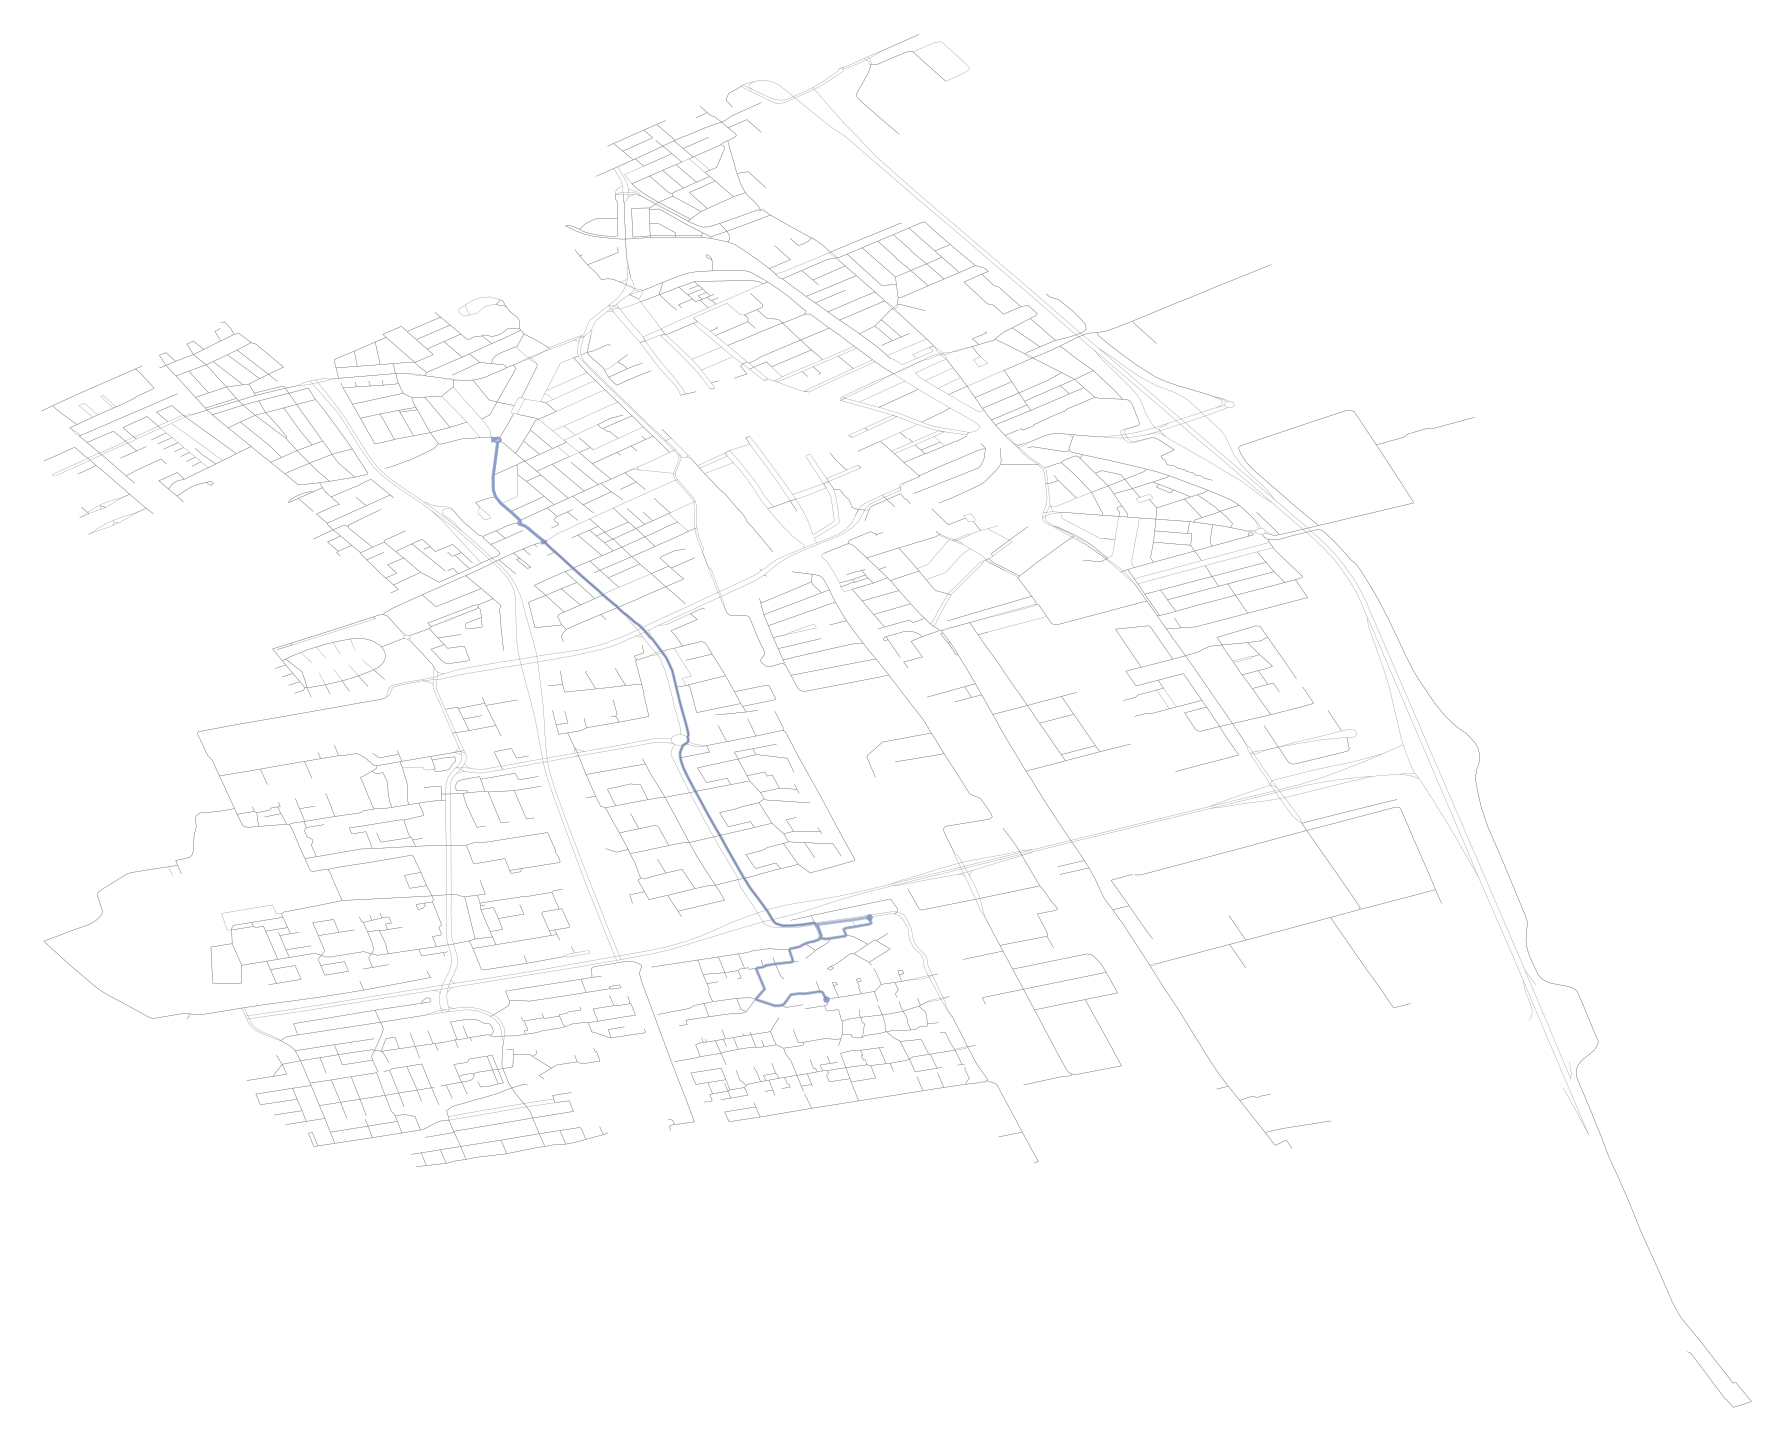

In [43]:
plot_map_rides(inData,[20])